In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm
import string
import re

# Data Preprocessing

1. Load and preprocess the corpus
2. Convert words to sequences
3. Define HMM parameters

In [13]:
# Read the corpus file
def load_corpus(file_path):
    with open(file_path, 'r') as f:
        words = f.read().splitlines()
    return words

# Preprocess words
def preprocess_words(words):
    # Convert to lowercase and remove non-alphabetic words
    processed_words = []
    for word in words:
        # Convert to lowercase
        word = word.lower()
        # Check if word contains only letters
        if word.isalpha():
            processed_words.append(word)
    
    return processed_words

# Load and preprocess corpus
corpus_path = 'Data/corpus.txt'
raw_words = load_corpus(corpus_path)
processed_words = preprocess_words(raw_words)

print(f"Total words in corpus: {len(raw_words)}")
print(f"Words after preprocessing: {len(processed_words)}")
print("\nSample words:")
print(processed_words[:10])

Total words in corpus: 50000
Words after preprocessing: 49979

Sample words:
['suburbanize', 'asmack', 'hypotypic', 'promoderationist', 'consonantly', 'philatelically', 'cacomelia', 'thicklips', 'luciferase', 'cinematography']


# Hidden Markov Model Implementation using hmmlearn

We'll use the `hmmlearn` library to implement our HMM with:

1. Hidden States: Letter positions in words (we'll use multiple HMMs for different word lengths)
2. Observations: The actual letters that appear in each position (26 possible letters)
3. Training with the Baum-Welch algorithm (implemented in hmmlearn)
4. Using the model for letter prediction in Hangman

In [16]:
class HangmanHMM:
    def __init__(self):
        self.models = {}  # Dictionary to store HMMs for different word lengths
        self.alphabet = string.ascii_lowercase
        self.letter_to_idx = {letter: idx for idx, letter in enumerate(self.alphabet)}
        self.idx_to_letter = {idx: letter for idx, letter in enumerate(self.alphabet)}
        
    def word_to_sequence(self, word):
        """Convert a word to a sequence of indices"""
        return [[self.letter_to_idx[letter]] for letter in word.lower()]
    
    def train_for_length(self, words_of_length, n_states=26):
        """Train HMM for words of a specific length"""
        if not words_of_length:
            return None
            
        # Convert words to sequences of indices
        sequences = [self.word_to_sequence(word) for word in words_of_length]
        lengths = [len(word) for word in words_of_length]
        X = np.concatenate(sequences)
        
        # Initialize and train HMM
        model = hmm.MultinomialHMM(n_components=n_states, n_iter=100)
        
        # Initialize emission probabilities to give higher probability to actual letters
        model.startprob_ = np.full(n_states, 1/n_states)
        model.transmat_ = np.full((n_states, n_states), 1/n_states)
        model.emissionprob_ = np.full((n_states, 26), 1/26)  # 26 possible emissions (letters)
        
        # Train the model
        model.fit(X, lengths=lengths)
        
        return model
    
    def train(self, words):
        """Train separate HMMs for different word lengths"""
        # Group words by length
        words_by_length = {}
        for word in words:
            length = len(word)
            if length not in words_by_length:
                words_by_length[length] = []
            words_by_length[length].append(word)
        
        # Train model for each word length
        for length, words_of_length in words_by_length.items():
            print(f"Training HMM for words of length {length} ({len(words_of_length)} words)")
            model = self.train_for_length(words_of_length)
            if model is not None:
                self.models[length] = model

# Create and train HMM
hmm_model = HangmanHMM()
hmm_model.train(processed_words)

# Print some statistics
print("\nTraining complete!")
print(f"Number of different word lengths: {len(hmm_model.models)}")
print("Word lengths available:", sorted(hmm_model.models.keys()))

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Training HMM for words of length 11 (5452 words)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Training HMM for words of length 6 (3755 words)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Training HMM for words of length 9 (6787 words)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Training HMM for words of length 16 (698 words)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Training HMM for words of length 14 (2019 words)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Training HMM for words of length 10 (6465 words)
Training HMM for words of length 8 (6348 words)
Training HMM for words of length 8 (6348 words)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
MultinomialHMM has undergone major changes. The previous version was implemen

Training HMM for words of length 12 (4292 words)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Training HMM for words of length 13 (3094 words)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Training HMM for words of length 5 (2340 words)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Training HMM for words of length 18 (174 words)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Training HMM for words of length 4 (1169 words)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Training HMM for words of length 3 (388 words)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Training HMM for words of length 7 (5111 words)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Training HMM for words of length 15 (1226 words)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Training HMM for words of length 17 (375 words)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 675 free scalar parameters with only 176 data points will result in a degenerate solution.
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization 

Training HMM for words of length 22 (8 words)
Training HMM for words of length 19 (88 words)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 675 free scalar parameters with only 168 data points wil

Training HMM for words of length 2 (84 words)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 675 free scalar parameters with only 46 data points will

Training HMM for words of length 1 (46 words)
Training HMM for words of length 20 (40 words)


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during i

Training HMM for words of length 21 (16 words)
Training HMM for words of length 23 (3 words)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 675 free scalar parameters with only 24 data points will result in a degenerate solution.
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization b

Training HMM for words of length 24 (1 words)

Training complete!
Number of different word lengths: 24
Word lengths available: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


# Prediction Functions

These functions will be used by the RL agent to get letter probabilities for making guesses.

In [27]:
class HangmanPredictor:
    def __init__(self, hmm_model):
        self.hmm_model = hmm_model
        self.alphabet = string.ascii_lowercase
        self.letter_to_idx = {letter: idx for idx, letter in enumerate(self.alphabet)}
        self.idx_to_letter = {idx: letter for idx, letter in enumerate(self.alphabet)}
        
    def get_letter_probabilities(self, word_length, known_positions=None):
        """
        Get probability distribution for each position in the word
        
        Args:
            word_length: Length of the target word
            known_positions: Dictionary of {position: letter} for known letters
        
        Returns:
            Array of probability distributions for each position
        """
        if word_length not in self.hmm_model.models:
            # Return uniform distribution if we don't have a model for this length
            return np.full((26, word_length), 1/26)
        
        model = self.hmm_model.models[word_length]
        
        # Create sequence of observed states with -1 for unknown positions
        obs_seq = -np.ones((word_length, 1), dtype=int)
        if known_positions:
            for pos, letter in known_positions.items():
                obs_seq[pos] = self.letter_to_idx[letter]
        
        # Get emission probabilities for each position
        emission_probs = np.zeros((26, word_length))
        for pos in range(word_length):
            if obs_seq[pos] == -1:  # Unknown position
                # Use the model's emission probabilities
                emission_probs[:, pos] = model.emissionprob_.sum(axis=0)
            else:  # Known position
                # Set probability to 1 for the known letter, 0 for others
                emission_probs[:, pos] = 0
                emission_probs[obs_seq[pos], pos] = 1
        
        # Normalize probabilities
        sums = emission_probs.sum(axis=0)
        sums[sums == 0] = 1  # Avoid division by zero
        emission_probs = emission_probs / sums[np.newaxis, :]
        
        return emission_probs
    
    def predict_next_letter(self, masked_word, guessed_letters):
        """
        Predict the next best letter to guess
        
        Args:
            masked_word: Current state of the word (e.g., "h_ll_")
            guessed_letters: Set of already guessed letters
            
        Returns:
            Tuple of (letter, probability)
        """
        word_length = len(masked_word)
        
        # Create known_positions dictionary
        known_positions = {
            i: char for i, char in enumerate(masked_word)
            if char != '_'
        }
        
        # Get probability distributions
        probs = self.get_letter_probabilities(word_length, known_positions)
        
        # Average probabilities across unknown positions only
        unknown_positions = [i for i, char in enumerate(masked_word) if char == '_']
        if unknown_positions:
            avg_probs = np.mean(probs[:, unknown_positions], axis=1)
        else:
            avg_probs = np.mean(probs, axis=1)
        
        # Set probability of guessed letters to 0
        for letter in guessed_letters:
            idx = self.letter_to_idx[letter]
            avg_probs[idx] = 0
            
        # Normalize remaining probabilities
        if np.sum(avg_probs) > 0:
            avg_probs = avg_probs / np.sum(avg_probs)
            
        # Get the letter with highest probability
        best_idx = np.argmax(avg_probs)
        best_letter = self.alphabet[best_idx]
        best_prob = avg_probs[best_idx]
        
        return best_letter, best_prob
    
    def predict_letter_probs(self, masked_word, guessed_letters):
        """
        Return a dictionary of {letter: probability} for integration with RL agent.
        
        Args:
            masked_word: Current state of the word (e.g., "h_ll_")
            guessed_letters: Set of already guessed letters
            
        Returns:
            Dictionary mapping each letter to its probability
        """
        word_length = len(masked_word)
        
        # Create known_positions dictionary
        known_positions = {
            i: char for i, char in enumerate(masked_word)
            if char != '_'
        }
        
        # Get probability distributions
        probs = self.get_letter_probabilities(word_length, known_positions)
        
        # Average probabilities across unknown positions only
        unknown_positions = [i for i, char in enumerate(masked_word) if char == '_']
        if unknown_positions:
            avg_probs = np.mean(probs[:, unknown_positions], axis=1)
        else:
            avg_probs = np.mean(probs, axis=1)
        
        # Set probability of guessed letters to 0
        for letter in guessed_letters:
            idx = self.letter_to_idx[letter]
            avg_probs[idx] = 0
            
        # Normalize remaining probabilities
        if np.sum(avg_probs) > 0:
            avg_probs = avg_probs / np.sum(avg_probs)
            
        # Create dictionary of letter probabilities
        return {self.idx_to_letter[i]: float(avg_probs[i]) for i in range(26)}

# Create predictor instance
predictor = HangmanPredictor(hmm_model)

# Test the predictor
test_word = "h_ll_"
guessed_letters = {'h', 'l'}
next_letter, probability = predictor.predict_next_letter(test_word, guessed_letters)
print(f"For word '{test_word}' with guessed letters {guessed_letters}")
print(f"Predicted next letter: {next_letter} (probability: {probability:.3f})")

# Test letter probability distribution
print("\nFull letter probability distribution:")
probs = predictor.predict_letter_probs(test_word, guessed_letters)
sorted_probs = sorted(probs.items(), key=lambda x: x[1], reverse=True)
for letter, prob in sorted_probs[:5]:  # Show top 5 predictions
    print(f"Letter '{letter}': {prob:.3f}")

For word 'h_ll_' with guessed letters {'l', 'h'}
Predicted next letter: a (probability: 0.042)

Full letter probability distribution:
Letter 'a': 0.042
Letter 'b': 0.042
Letter 'c': 0.042
Letter 'd': 0.042
Letter 'e': 0.042


# Save Model for RL Agent

Save our trained HMM model and predictor for use in the Reinforcement Learning part.

In [28]:
import pickle

# Save the HMM model and predictor
model_data = {
    'hmm_model': hmm_model,
    'predictor': predictor
}

with open('hmm_hangman_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("Model saved successfully! You can now use it in the RL notebook.")

Model saved successfully! You can now use it in the RL notebook.


# Model Validation

We'll validate our HMM model using the test.txt file by:
1. Loading test words
2. For each word:
   - Simulate partial word knowledge (like in Hangman)
   - Use our model to predict next letters
   - Calculate prediction accuracy
3. Analyze and visualize results

In [29]:
# Load and preprocess test data
test_path = 'Data/test.txt'
test_words = load_corpus(test_path)
test_words = preprocess_words(test_words)

print(f"Number of test words: {len(test_words)}")
print(f"Sample test words: {test_words[:5]}")

Number of test words: 2000
Sample test words: ['marmar', 'janet', 'dentistical', 'troveless', 'unnotify']


In [30]:
# Run validation tests
def validate_prediction(word, num_revealed=1):
    """Test predictor on a word by revealing num_revealed random letters initially"""
    # Create initial masked word with some revealed letters
    word = word.lower()
    masked = ['_'] * len(word)
    guessed_letters = set()
    
    # Randomly reveal some letters
    indices = np.random.choice(len(word), num_revealed, replace=False)
    for idx in indices:
        masked[idx] = word[idx]
        guessed_letters.add(word[idx])
    
    masked_word = ''.join(masked)
    
    # Get prediction
    next_letter, probability = predictor.predict_next_letter(masked_word, guessed_letters)
    
    # Check if prediction is correct (letter appears in remaining positions)
    remaining_letters = set(c for i, c in enumerate(word) 
                          if c not in guessed_letters and masked[i] == '_')
    is_correct = next_letter in remaining_letters
    
    return {
        'word': word,
        'masked_word': masked_word,
        'prediction': next_letter,
        'prediction_probability': probability,
        'is_correct': is_correct,
        'guessed_letters': guessed_letters
    }

# Run validation on test words
results = []
np.random.seed(42)  # For reproducibility

for word in test_words:
    # Test with 1 revealed letter for words length > 3, otherwise reveal nothing
    num_revealed = 1 if len(word) > 3 else 0
    result = validate_prediction(word, num_revealed)
    results.append(result)

print(f"Total validation tests: {len(results)}")
print(f"Sample result: {results[0]}")

Total validation tests: 2000
Sample result: {'word': 'marmar', 'masked_word': 'm_____', 'prediction': 'a', 'prediction_probability': np.float64(0.04), 'is_correct': True, 'guessed_letters': {'m'}}


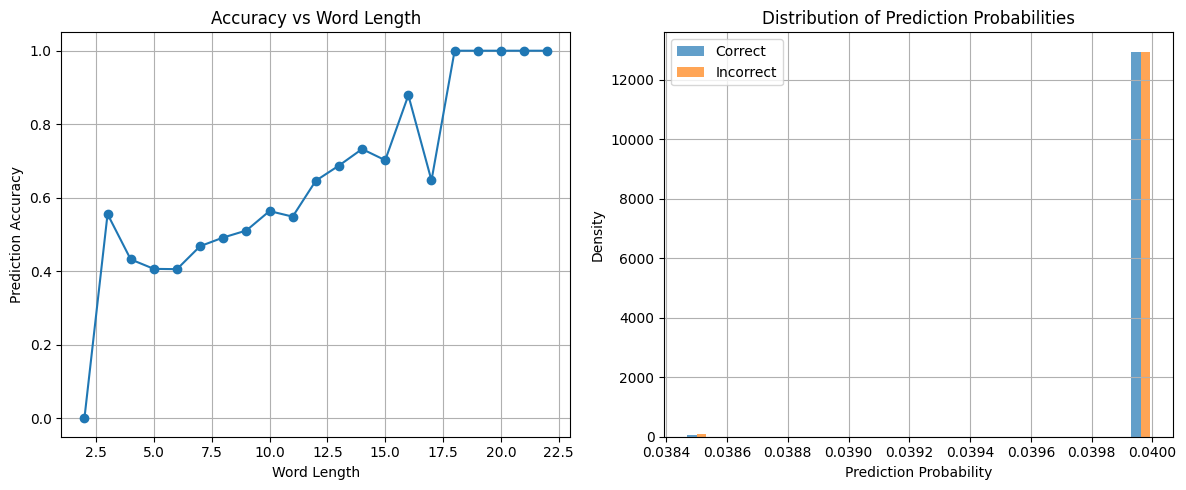


Detailed Statistics:
Number of test cases: 2000
Average word length: 9.6

Accuracy by word length:
Length 2: 0.00% (2 words)
Length 3: 55.56% (9 words)
Length 4: 43.24% (37 words)
Length 5: 40.66% (91 words)
Length 6: 40.58% (138 words)
Length 7: 46.83% (205 words)
Length 8: 49.19% (246 words)
Length 9: 51.09% (274 words)
Length 10: 56.38% (282 words)
Length 11: 54.87% (226 words)
Length 12: 64.63% (164 words)
Length 13: 68.75% (128 words)
Length 14: 73.26% (86 words)
Length 15: 70.21% (47 words)
Length 16: 87.88% (33 words)
Length 17: 64.71% (17 words)
Length 18: 100.00% (8 words)
Length 19: 100.00% (3 words)
Length 20: 100.00% (2 words)
Length 21: 100.00% (1 words)
Length 22: 100.00% (1 words)


In [31]:
# Visualize results
plt.figure(figsize=(12, 5))

# Plot 1: Accuracy vs Word Length
plt.subplot(1, 2, 1)
word_lengths = [len(r['word']) for r in results]
correct_predictions = [r['is_correct'] for r in results]

accuracy_by_length = {}
for length, correct in zip(word_lengths, correct_predictions):
    if length not in accuracy_by_length:
        accuracy_by_length[length] = []
    accuracy_by_length[length].append(correct)

lengths = sorted(accuracy_by_length.keys())
accuracies = [np.mean(accuracy_by_length[l]) for l in lengths]

plt.plot(lengths, accuracies, 'o-')
plt.xlabel('Word Length')
plt.ylabel('Prediction Accuracy')
plt.title('Accuracy vs Word Length')
plt.grid(True)

# Plot 2: Probability Distribution of Correct vs Incorrect Predictions
plt.subplot(1, 2, 2)
correct_probs = [r['prediction_probability'] for r in results if r['is_correct']]
incorrect_probs = [r['prediction_probability'] for r in results if not r['is_correct']]

plt.hist([correct_probs, incorrect_probs], label=['Correct', 'Incorrect'], 
         bins=20, alpha=0.7, density=True)
plt.xlabel('Prediction Probability')
plt.ylabel('Density')
plt.title('Distribution of Prediction Probabilities')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print additional statistics
print("\nDetailed Statistics:")
print(f"Number of test cases: {len(results)}")
print(f"Average word length: {np.mean(word_lengths):.1f}")
print("\nAccuracy by word length:")
for length in sorted(accuracy_by_length.keys()):
    acc = np.mean(accuracy_by_length[length])
    count = len(accuracy_by_length[length])
    print(f"Length {length}: {acc:.2%} ({count} words)")